In [6]:
import sys 
sys.path.append("../")
from voxelgrid_slices import compute_slice_mesh_trimesh
import trimesh
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from code_snippets_alex import correspond_slice

In [63]:
def eval_transfer(x,y,slice_params_1,side='right'):
    mat = sio.loadmat('../../../correspondence_mat/'+side+'/out_'+str(y)+'_'+str(x)+'.mat')
    mesh_2 = trimesh.Trimesh(mat['verts_x'],mat['faces_x'])
    mesh_1 = trimesh.load('../../../data/'+str(x)+'.ply')
    x2y = mat['y2x'].squeeze()
    y2x = mat['x2y'].squeeze()
    slice_params_2,pts = correspond_slice(slice_params_1,mesh_1,mesh_2,x2y,k=10)
    slice_params_1_new,pts = correspond_slice(slice_params_2,mesh_2,mesh_1,y2x,k=10)
                      
    return np.abs(slice_params_1[0] - slice_params_1_new[0]).mean(),slice_params_1_new, slice_params_2

11.517578472901674 5.355790129234675


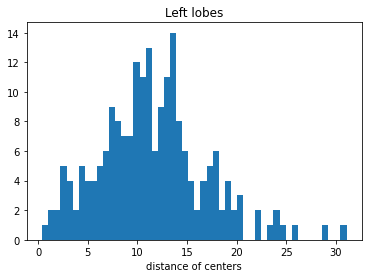

In [72]:
side = 'left'
thyroid_list = np.arange(0,32,step=2)
results = []
bad_examples = []
good_examples = []
y = -1
for x in thyroid_list:
    mesh_1 = trimesh.load('../../../data/'+str(x)+'.ply')
    for z_coord in np.arange(mesh_1.vertices.min(axis=0)[2]+50,\
                             mesh_1.vertices.max(axis=0)[2]-50,step=20):
        center = mesh_1.vertices.mean(axis=0)
        center[2] = z_coord
        slice_params = (center, np.array((1.,0,0)), np.array((0,1,0)), 200., 200.)
        dist,slice_params_1_new, slice_params_2 = eval_transfer(x,y,slice_params,side)
        results.append(dist)
        if dist>40:
            bad_examples.append([x,y,slice_params,slice_params_1_new,dist,slice_params_2])
        if 8<dist<15:
            good_examples.append([x,y,slice_params,slice_params_1_new,dist,slice_params_2])

     
_=plt.hist(results,bins=50)
plt.xlabel('distance of centers')
plt.title('Left lobes')
plt.savefig('eval_slice_transfer_left.png')
print(np.array(results).mean(),np.array(results).std())

14.037017022690486 9.815648558810665


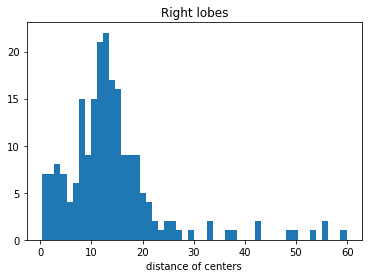

In [73]:
side = 'right'
thyroid_list = np.arange(1,32,step=2)
results = []
bad_examples = []
good_examples = []
y = -1
for x in thyroid_list:
    mesh_1 = trimesh.load('../../../data/'+str(x)+'.ply')
    for z_coord in np.arange(mesh_1.vertices.min(axis=0)[2]+50,\
                             mesh_1.vertices.max(axis=0)[2]-50,step=20):
        center = mesh_1.vertices.mean(axis=0)
        center[2] = z_coord
        slice_params = (center, np.array((1.,0,0)), np.array((0,1,0)), 200., 200.)
        
        dist,slice_params_1_new,slice_params_2 = eval_transfer(x,y,slice_params,side)
        results.append(dist)
        if dist>40:
            bad_examples.append([x,y,slice_params,slice_params_1_new,dist,slice_params_2])
        if 8<dist<15:
            good_examples.append([x,y,slice_params,slice_params_1_new,dist,slice_params_2])

        
_=plt.hist(results,bins=50)
plt.xlabel('distance of centers')
plt.title('Right lobes')
plt.savefig('eval_slice_transfer_right.png')
print(np.array(results).mean(),np.array(results).std())

In [77]:
examples = bad_examples
id = 0
examples[id]

[21,
 -1,
 (TrackedArray([244.84574394, 212.05169924,  94.16065216]),
  array([1., 0., 0.]),
  array([0, 1, 0]),
  200.0,
  200.0),
 (TrackedArray([172.01167145, 279.8477478 , 100.58384552]),
  array([1., 0., 0.]),
  array([0, 1, 0]),
  200.0,
  200.0),
 TrackedArray(49.01777147),
 (TrackedArray([ 0.14259052, -0.10906632,  0.25951367]),
  array([1., 0., 0.]),
  array([0, 1, 0]),
  200.0,
  200.0)]

In [79]:
x = examples[id][0]
y = examples[id][1]
mat = sio.loadmat('../../../correspondence_mat/right/out_'+str(y)+'_'+str(x)+'.mat')
mesh_2 = trimesh.Trimesh(mat['verts_x'],mat['faces_x'])
mesh_1 = trimesh.load('../../../data/'+str(x)+'.ply')
x2y = mat['y2x'].squeeze()
y2x = mat['x2y'].squeeze()
slice_params_1 = examples[id][2]
slice_params_2,pts = correspond_slice(slice_params_1,mesh_1,mesh_2,x2y,k=10)
scene = trimesh.Scene([mesh_1, compute_slice_mesh_trimesh(*slice_params_1, color=[0,1.,0])])
scene.set_camera(angles=(-1, .6, 0.), distance=1000, center=(0,0,0))
scene.show()

In [80]:
slice_params_1_new = examples[id][3]
scene = trimesh.Scene([mesh_1, compute_slice_mesh_trimesh(*slice_params_1_new, color=[0,1.,0])])
scene.set_camera(angles=(-1, .6, 0.), distance=1000, center=(0,0,0))
scene.show()

In [71]:
slice_params_2 = list(examples[id][5])
slice_params_2[3],slice_params_2[4] = 0.6,0.6
scene = trimesh.Scene([mesh_2, compute_slice_mesh_trimesh(*slice_params_2, color=[0,1.,0])])
scene.set_camera(angles=(-1.2, .8, 0.2), distance=2, center=(0,0,0))
scene.show()

In [74]:
len(results)

211